I enjoy chess casually, and have always been impressed and a little baffled by those who are able to play it at high levels. So let's do a few quick visualizations to see if we can uncover any trends amongst some of the world's best players (with ELO ratings ~2000 higher than my own rating on Chess.com)

In [30]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


## Importation and Examination of Dataset

In [48]:
df = pd.read_csv('Chess FIDE Rankings.csv')

In [56]:
df.head()

,rank,name,ELO,title,federation,games,birth_year
0,1,Magnus Carlsen,2864,GM,Norway,3125,1990
1,2,Liren Ding,2806,GM,China,1630,1992
2,3,Alireza Firouzja,2793,GM,France,845,2003
3,4,Fabiano Caruana,2783,GM,United States,2622,1992
4,5,Levon Aronian,2775,GM,United States,3320,1982


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        200 non-null    int64 
 1   name        200 non-null    object
 2   ELO         200 non-null    int64 
 3   title       200 non-null    object
 4   federation  200 non-null    object
 5   games       200 non-null    int64 
 6   birth_year  200 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 11.1+ KB


In [55]:
df.describe()

,rank,ELO,games,birth_year
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,2662.385000,1394.185000,1989.395000
std,57.879185,47.208793,776.177129,9.057548
min,1.000000,2608.000000,277.000000,1965.000000
25%,50.750000,2623.750000,785.000000,1984.000000
50%,100.500000,2650.500000,1211.000000,1990.000000
75%,150.250000,2686.000000,1784.000000,1996.000000
max,200.000000,2864.000000,3913.000000,2006.000000


## Data Cleaning
It's a small, concise and complete dataset but there are still a few issues that should be cleaned up before analysis and visualization. Firstly, all of the column headers contain trailing whitespace that can be stripped.

In [52]:
df.columns = df.columns.str.strip()

All 200 players have the same title (GM) so the title column can be dropped.

In [54]:
df.columns


Index(['rank', 'name', 'ELO', 'title', 'federation', 'games', 'birth_year'], dtype='object')

In [36]:
df.drop('title', axis=1, inplace=True)

I'm planning on visualizing the dataset largely based on the age of the players. These visualations will be a little bit clear and straightforward if we replace the birth_year column with an age column.

In [37]:
import datetime
df['age'] = datetime.datetime.now().year - df['birth_year']
df.drop('birth_year', axis=1,inplace=True)

## EDA & Visualization

### Player Count by Federation

In [38]:
plt.figure(figsize=(18,6))
px.treemap(df, path=['federation'], title='')

<Figure size 1296x432 with 0 Axes>

In [39]:
df[df['federation'] == 'FIDE ']

,rank,name,ELO,federation,games,age
19,20,Dmitry Andreikin,2729,FIDE,1567,32
23,24,Nikita Vitiugov,2722,FIDE,1768,35
29,30,Kirill Alekseenko,2708,FIDE,885,25
47,48,Alexandr Predke,2688,FIDE,933,28
48,49,Vladimir Fedoseev,2686,FIDE,1576,27
57,58,Andrey Esipenko,2682,FIDE,949,20
81,82,Alexey Sarana,2668,FIDE,1020,22
95,96,Anton Demchenko,2653,FIDE,882,35
98,99,Vladimir Malakhov,2651,FIDE,1855,42
135,136,Maksim Chigaev,2632,FIDE,1145,26


### ELO Rating by Number of Games Played

<AxesSubplot:xlabel='games', ylabel='ELO'>

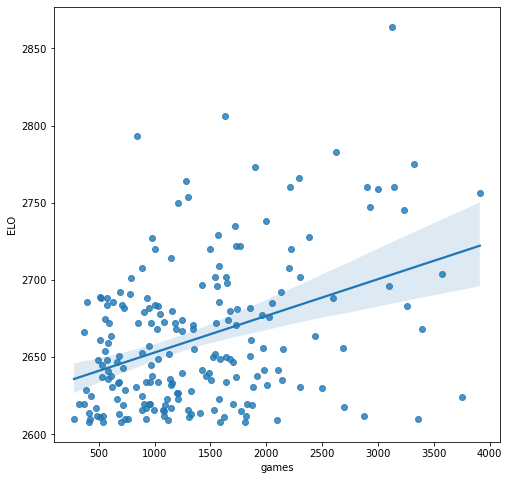

In [40]:
plt.figure(figsize=(8,8))
sns.regplot(data=df, x='games', y='ELO')

### ELO Rating by Age

<AxesSubplot:xlabel='age', ylabel='ELO'>

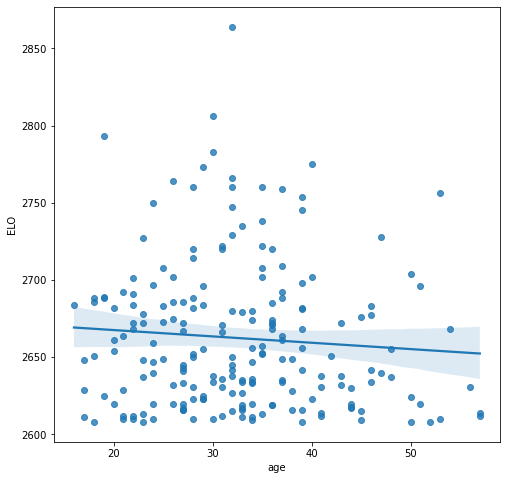

In [41]:
plt.figure(figsize=(8,8))
sns.regplot(data=df, x='age', y='ELO')

The plot shows a slight negative correlation between age and ELO rating.

### FIDE Membership by Age

<AxesSubplot:xlabel='age', ylabel='Count'>

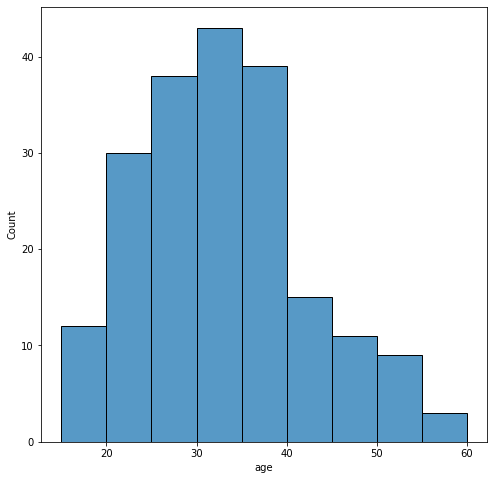

In [42]:
plt.figure(figsize=(8,8))
sns.histplot(df['age'], binrange = (15,60), binwidth=5)